In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('machine.csv', usecols=[0,1,7])

df = pd.DataFrame(df)
df


,Rotational speed [rpm],Torque [Nm],Machine failure
0,1551,42.8,0
1,1408,46.3,0
2,1498,49.4,0
3,1433,39.5,0
4,1408,40.0,0
...,...,...,...
9810,1604,29.5,0
9811,1632,31.8,0
9812,1645,33.4,0
9813,1408,48.5,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Machine failure',axis=1),df['Machine failure'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((6870, 2), (2945, 2))

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #using sckit learn minmax feature scaling
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
np.round(X_train_scaled.describe(), 1)

,Rotational speed [rpm],Torque [Nm]
count,6870.0,6870.0
mean,0.0,-0.0
std,1.0,1.0
min,-2.4,-2.5
25%,-0.7,-0.7
50%,-0.2,-0.0
75%,0.5,0.7
max,3.7,3.0


## Effect of Scaling

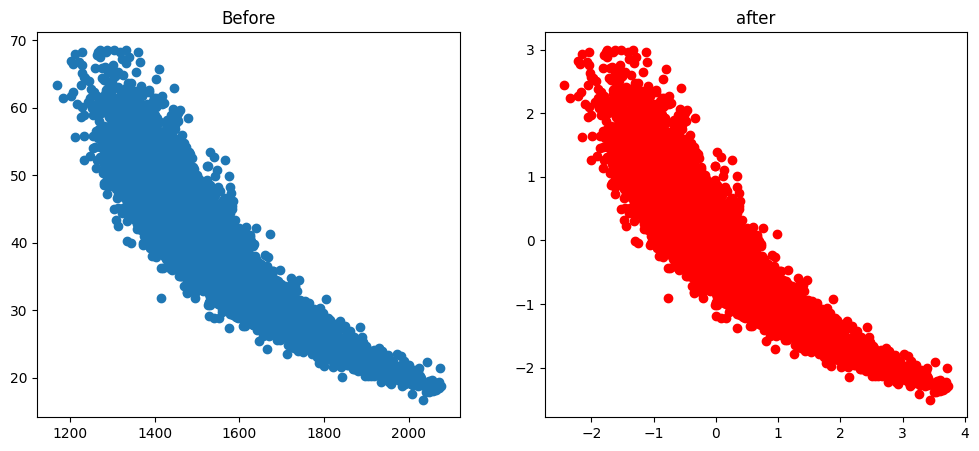

In [32]:
##using z-score or standardization from scikit learn 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Rotational speed [rpm]'], X_train['Torque [Nm]'])
ax1.set_title('Before')
ax2.scatter(X_train_scaled['Rotational speed [rpm]'], X_train_scaled['Torque [Nm]'],color='red')
ax2.set_title('after')
plt.show()

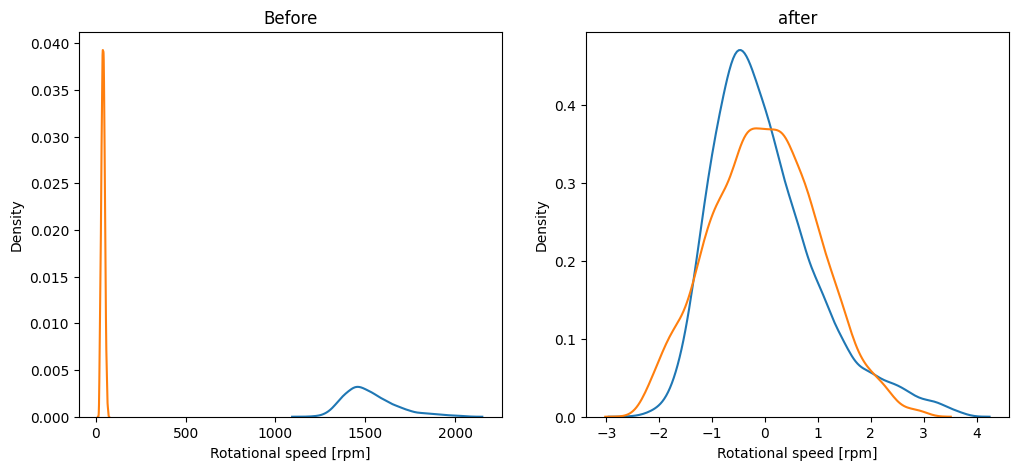

In [33]:
## with the help of we can compare the uncomparable data and scaling them makes them comparable
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before')
sns.kdeplot(X_train['Rotational speed [rpm]'],ax=ax1)
sns.kdeplot(X_train['Torque [Nm]'],ax=ax1)

ax2.set_title('after')
sns.kdeplot(X_train_scaled['Rotational speed [rpm]'],ax=ax2)
sns.kdeplot(X_train_scaled['Torque [Nm]'],ax=ax2)

plt.show()